In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
##Imports!!!!!

In [2]:
df = pd.read_csv("autoMPG_data.csv",decimal=',') ##load datafile, handle decimals with the ""," mark
x = df.iloc[:, [4]] ##Silly way to determine the plotting variables
y = df.iloc[:, [5]] ##Silly way to determine the plotting variables
x
y
x['Displacement100ci'].fillna(0) ##fill null values with a 0
y['Horsepower100'].fillna(0) ##fill null values with a 0

##train1 = df.iloc[:, [0]] 33old way of handling dependent variable lol
##train2 = df.iloc[:, [3]] ##old way of handling independent variable lol

train1 = df[['Displacement100ci', 'Horsepower100', 'Cylinders']]  # independent variables used to train model
train2 = df[['GallonsPer100Miles']]  # Dependent variable in training the model. Do NOT change


In [3]:
model = LinearRegression().fit(train1,train2) ##Train the model

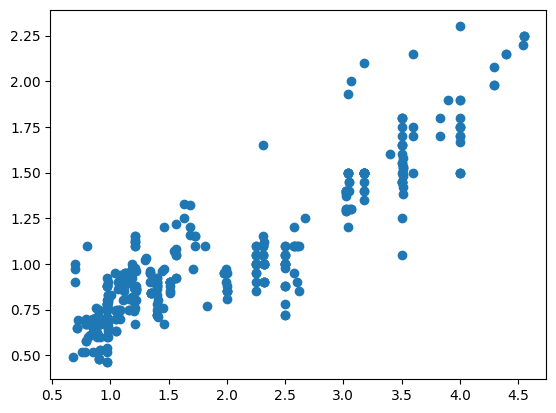

In [4]:
plt.scatter(x,y) ## Scatter the data

In [5]:
model.coef_ ##model coefficiency 

array([[0.48475632, 1.74934052, 0.20626288]])

In [6]:
model.intercept_ ##intercept value

array([0.8860863])

In [7]:
model.score(train1,train2)*100 ##check model accuracy

78.5192051588841

In [8]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data (use X_test, not x_test)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

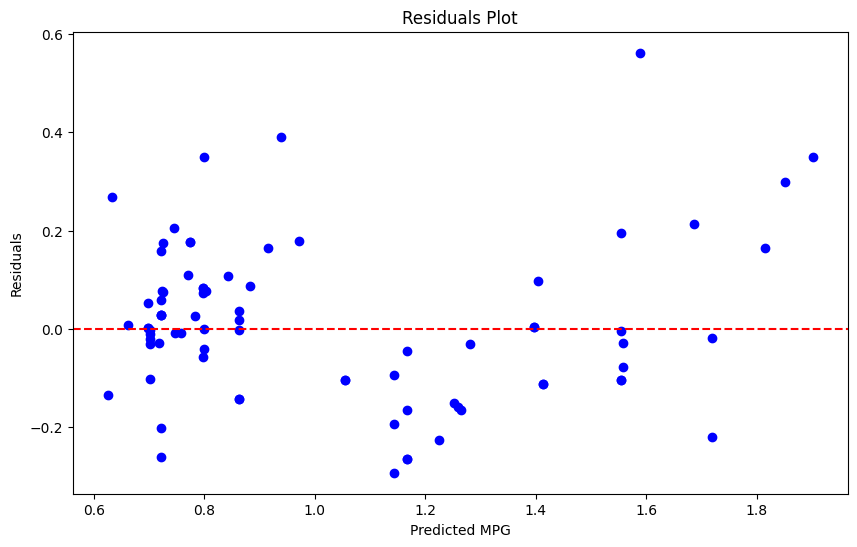

In [11]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [20]:
# Test with new values (Interpolation)
new_values_interp = pd.DataFrame({
    'Displacement100ci': [150, 200]  # Match column names exactly
})

# Predict MPG for the new values
pred_interp = model.predict(new_values_interp)
print("Predictions for Interpolation Range:")
print(pred_interp)


Predictions for Interpolation Range:
[[49.82140679]
 [66.294615  ]]


In [23]:
# Test with new values (Extrapolation)
new_values_extrap = pd.DataFrame({
    
    'Displacement100ci': [500, 700] # Uncommon engine displacement
})

# Predict MPG for the new values
pred_extrap = model.predict(new_values_extrap)
print("Predictions for Extrapolation Range:")
print(pred_extrap)

Predictions for Extrapolation Range:
[[165.13386426]
 [231.02669711]]
